In [6]:
import matplotlib.pyplot as plt
import json


In [4]:
def load_json(path):
    with open(path, "r") as f:
        return json.load(f)

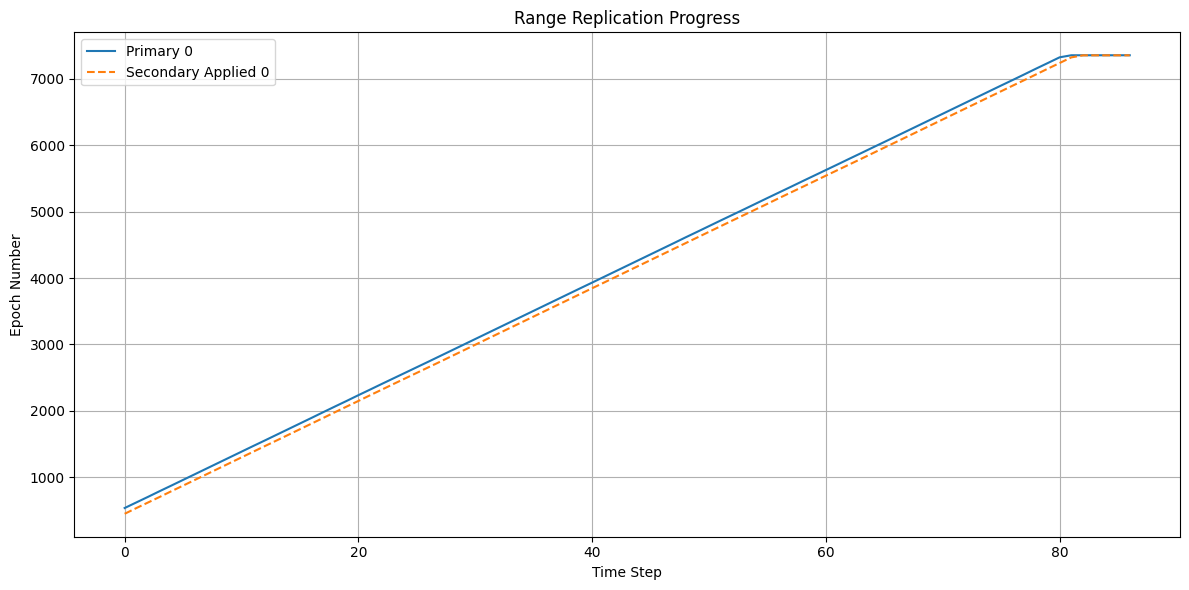

In [24]:
results = load_json("../experiments/ray_logs/space_yak_0f48ac5d/results.json")
first_trial = next(iter(results.values()))
first_trial

primary_ranges = first_trial["replication_metrics"]["primary_ranges"]
secondary_ranges = first_trial["replication_metrics"]["secondary_ranges"]

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot primary ranges (solid lines)
for idx, range_data in enumerate(primary_ranges.values()):
    epochs = range_data["latest_wal_epoch"]
    ax.plot(range(len(epochs)), epochs, label=f"Primary {idx}", linestyle="-")

# Plot secondary ranges (dotted lines)
for idx, range_data in enumerate(secondary_ranges.values()):
    wal_epochs = range_data["wal_epoch"]
    applied_epochs = range_data["applied_epoch"]

    # ax.plot(range(len(wal_epochs)), wal_epochs,
    #         label=f"Secondary WAL {idx}",
    #         linestyle=":")
    ax.plot(range(len(applied_epochs)), applied_epochs,
            label=f"Secondary Applied {idx}",
            linestyle="--")

ax.set_xlabel("Time Step")
ax.set_ylabel("Epoch Number")
ax.set_title("Range Replication Progress")
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

